In [1]:

#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import email
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
import gensim
from gensim import corpora

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None
from nltk.stem.snowball import SnowballStemmer
import demoji
import gensim
from gensim.utils import simple_preprocess


import warnings
warnings.filterwarnings("ignore")





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Cleaning

In [2]:
# Specify the URL
url = "https://raw.githubusercontent.com/dhavalpotdar/cyberbullying-detection/master/data/data/data.csv"
df = pd.read_csv(url,sep='\t',header=None)
# Print the data
df.head(20)

0                                                  1  \
0   572340447797903360  RT @colonelkickhead: Another bloody instant re...   
1   560934139403436032  @azzamalirhabi @JihadiA8 This video of the Pes...   
2   575597326519042050  Oh really? No more instant restaurants? THAT'S...   
3   552487055553757187  RT @Benfrancisallen: It hasn't been a good few...   
4   563306298788151300  RT @NoToFeminism: I don’t need femisnsn becaus...   
5   562782575656435717      @MariachiMacabre 19% is not the vast majority   
6   571776252656287744  @DianH4 @ExposeFalsehood And it is Muslims who...   
7   567015045561712641  @truaemusic @mattybboi83 @Number10gov Capital ...   
8   565363767090085896  RT @fruitondabottom: #FeminismisEQUALITYwhen M...   
9   563084011489480704  Gather round, kids. It's story time, brought t...   
10  570989435287764994  Did you hear that? That's the sound of a bunch...   
11  559861333269544961        @jobbers7 And western feminists are silent.   
12  572015605575892992  @NedGilmore you were the rogue? I don't usuall...   
13  561147028752064513  .@GRIMACHU Sounds a bit too much like "separat...   
14  566313975835787267  RT @triggerasaurus: I disagree with .@wadhwa b...   
15  572330737690492928    hot damn that checkout guy at coles tho 👌👌 #mkr   
16  566782677886697472  Still the best website on the internet: http:/...   
17  559472688516055044  @LifeInKhilafah You are right. The violent mur...   
18  571478633732182016  @ChrisWarcraft @alexlifschitz prove it. WHERE ...   
19  570993190724964352  @PeerWorker uh. because one group is literally...   

         2  
0     none  
1     none  
2     none  
3     none  
4     none  
5     none  
6   racism  
7   racism  
8   sexism  
9     none  
10    none  
11    none  
12    none  
13  sexism  
14    none  
15    none  
16    none  
17  racism  
18    none  
19    none

In [3]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [4]:
df = df.drop(0, axis=1)

In [5]:
print(df.dtypes)

1    object
2    object
dtype: object


In [6]:
df = df.rename(columns={1: 'old'})
df = df.rename(columns={2: 'type'})

# print the new header
print(df.columns)

Index(['old', 'type'], dtype='object')


In [7]:
df2= pd.read_csv('cyber1.csv') 

In [8]:
df = pd.concat([df, df2])

In [9]:
df.loc[df["type"] == "none ", "type"] ="none"

In [10]:
df["type"].value_counts()

none         18953
religion      7998
age           7992
gender        7973
ethnicity     7961
sexism        3110
racism        1932
Name: type, dtype: int64

In [11]:
print(df.shape)

(55919, 2)


In [12]:
df.head(10)

old    type
0  RT @colonelkickhead: Another bloody instant re...    none
1  @azzamalirhabi @JihadiA8 This video of the Pes...    none
2  Oh really? No more instant restaurants? THAT'S...    none
3  RT @Benfrancisallen: It hasn't been a good few...    none
4  RT @NoToFeminism: I don’t need femisnsn becaus...    none
5      @MariachiMacabre 19% is not the vast majority    none
6  @DianH4 @ExposeFalsehood And it is Muslims who...  racism
7  @truaemusic @mattybboi83 @Number10gov Capital ...  racism
8  RT @fruitondabottom: #FeminismisEQUALITYwhen M...  sexism
9  Gather round, kids. It's story time, brought t...    none

In [13]:
df['old'].duplicated().sum()

8778

In [14]:
df.drop_duplicates("old", inplace = True)
df['old'].duplicated().sum()

0

In [15]:
#stemmer = SnowballStemmer('english')
def clean_text(text):
    text = text.lower()
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"'m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub(r"(\#\w+)", "", text)
    text = re.sub(r"(\@\w+)", "", text)
    text = re.sub(r"\S*https?:\S*", "", text)
    text = re.sub("http\S+","",text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(' s ',' is ',text)
    text = re.sub(r"rt ", "", text)
    text = text.lstrip().rstrip()
    emoji = demoji.findall(text)
     # Stemming
    #text = " ".join([stemmer.stem(word) for word in text.split()])
    
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)
    return text

In [16]:
df['new'] = df["old"].apply(clean_text)
df['new'].head(15)

0     colonelkickhead another bloody instant restaur...
1     azzamalirhabi jihadia this video of the peshme...
2     oh really no more instant restaurants that is ...
3     benfrancisallen it has not been a good few wee...
4     notofeminism i don t need femisnsn because men...
5              mariachimacabre is not the vast majority
6     dianh exposefalsehood and it is muslims who we...
7     truaemusic mattybboi number gov capital hill i...
8     fruitondabottom feminismisequalitywhen men are...
9     gather round kids it is story time brought to ...
10    did you hear that that is the sound of a bunch...
11             jobbers and western feminists are silent
12    nedgilmore you were the rogue i do not usually...
13    grimachu sounds a bit too much like separate b...
14    triggerasaurus i disagree with wadhwa but stop...
Name: new, dtype: object

In [17]:
df.head(30)

old    type  \
0   RT @colonelkickhead: Another bloody instant re...    none   
1   @azzamalirhabi @JihadiA8 This video of the Pes...    none   
2   Oh really? No more instant restaurants? THAT'S...    none   
3   RT @Benfrancisallen: It hasn't been a good few...    none   
4   RT @NoToFeminism: I don’t need femisnsn becaus...    none   
5       @MariachiMacabre 19% is not the vast majority    none   
6   @DianH4 @ExposeFalsehood And it is Muslims who...  racism   
7   @truaemusic @mattybboi83 @Number10gov Capital ...  racism   
8   RT @fruitondabottom: #FeminismisEQUALITYwhen M...  sexism   
9   Gather round, kids. It's story time, brought t...    none   
10  Did you hear that? That's the sound of a bunch...    none   
11        @jobbers7 And western feminists are silent.    none   
12  @NedGilmore you were the rogue? I don't usuall...    none   
13  .@GRIMACHU Sounds a bit too much like "separat...  sexism   
14  RT @triggerasaurus: I disagree with .@wadhwa b...    none   
15    hot damn that checkout guy at coles tho 👌👌 #mkr    none   
16  Still the best website on the internet: http:/...    none   
17  @LifeInKhilafah You are right. The violent mur...  racism   
18  @ChrisWarcraft @alexlifschitz prove it. WHERE ...    none   
19  @PeerWorker uh. because one group is literally...    none   
20                                   @BrentonPoke yes    none   
21                        @BenKuchera I SAW YOUR FACE    none   
22  RT @TheBigKahuna12 I'm not sexist, but I'm jus...  sexism   
23  The lack of self-awareness from @wadhwa right ...    none   
24        well ya standards are pretty low bitch #MKR  sexism   
25  @grexican Yes, because the evo psych DIFFERENC...    none   
26  @wammezz It's used because the uranium allows ...    none   
27  I do have to go get us an actual business addr...    none   
28  RT @Witchsistah: The Entire History of Anti-Ra...    none   
29  RT @NewIdeamagazine: The moment of truth... Di...    none   

                                                  new  
0   colonelkickhead another bloody instant restaur...  
1   azzamalirhabi jihadia this video of the peshme...  
2   oh really no more instant restaurants that is ...  
3   benfrancisallen it has not been a good few wee...  
4   notofeminism i don t need femisnsn because men...  
5            mariachimacabre is not the vast majority  
6   dianh exposefalsehood and it is muslims who we...  
7   truaemusic mattybboi number gov capital hill i...  
8   fruitondabottom feminismisequalitywhen men are...  
9   gather round kids it is story time brought to ...  
10  did you hear that that is the sound of a bunch...  
11           jobbers and western feminists are silent  
12  nedgilmore you were the rogue i do not usually...  
13  grimachu sounds a bit too much like separate b...  
14  triggerasaurus i disagree with wadhwa but stop...  
15        hot damn that checkout guy at coles tho mkr  
16  still the best website on the internet stopwadhwa  
17  lifeinkhilafah you are right the violent murde...  
18  chriswarcraft alexlifschitz prove it where is ...  
19  peerworker uh because one group is literally k...  
20                                    brentonpoke yes  
21                         benkuchera i saw your face  
22  thebigkahuna i am not sexist but i am just not...  
23  the lack of self awareness from wadhwa right n...  
24         well ya standards are pretty low bitch mkr  
25  grexican yes because the evo psych difference ...  
26  wammezz it is used because the uranium allows ...  
27  i do have to go get us an actual business addr...  
28  witchsistah the entire history of anti racism ...  
29  newideamagazine the moment of truth did the gi...

# Exploratory data analysis

In [18]:
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0          old              0              0.0
1         type              0              0.0
2          new              0              0.0


In [19]:
## Assess the shape of the data
print("The Shape of the Dataset".format(),df.shape)

The Shape of the Dataset (47141, 3)


In [20]:
neutre=df[df["type"]=='none']['new']
sexism=df[df["type"]=='racism']['new']
racism=df[df["type"]=='sexism']['new']
gender=df[df["type"]=='gender']['new']
age=df[df["type"]=='age']['new']
ethnicity=df[df["type"]=='ethnicity']['new']
religion=df[df["type"]=='religion']['new']
print("First 5 samples of neutre mails\n".format(),neutre[:5])
print("First 5 samples of racism mails\n".format(),racism[:5])
print("First 5 samples of sexism mails\n".format(),sexism[:5])

print("First 5 samples of gender mails\n".format(),gender[:5])
print("First 5 samples of age mails\n".format(),age[:5])
print("First 5 samples of ethnicity mails\n".format(),ethnicity[:5])
print("First 5 samples of religion mails\n".format(),religion[:5])

First 5 samples of neutre mails
 0    colonelkickhead another bloody instant restaur...
1    azzamalirhabi jihadia this video of the peshme...
2    oh really no more instant restaurants that is ...
3    benfrancisallen it has not been a good few wee...
4    notofeminism i don t need femisnsn because men...
Name: new, dtype: object
First 5 samples of racism mails
 8     fruitondabottom feminismisequalitywhen men are...
13    grimachu sounds a bit too much like separate b...
22    thebigkahuna i am not sexist but i am just not...
24           well ya standards are pretty low bitch mkr
44    travisnashh yesyouresexist because you hate a ...
Name: new, dtype: object
First 5 samples of sexism mails
 6     dianh exposefalsehood and it is muslims who we...
7     truaemusic mattybboi number gov capital hill i...
17    lifeinkhilafah you are right the violent murde...
36    pyrrha i agree he is just like the prophet moh...
40    discerningmumin hamas was elected once and hav...
Name: new, dtype

Total Counts of both sets none         14339
age           7992
ethnicity     7942
religion      6343
gender        5483
sexism        3110
racism        1932
Name: type, dtype: int64


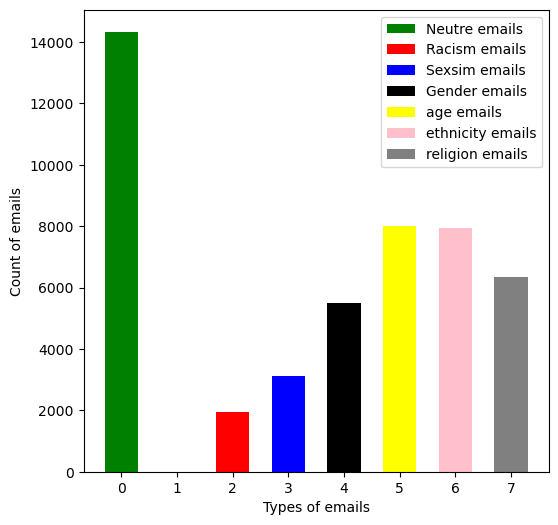

In [21]:
#Count of racism  and sexism mails
count=df["type"].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_neutre,count_rasicm,count_sexsim,count_gender,count_age,count_ethnicity,count_religion):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_neutre,width=0.6,label='Neutre emails',color='Green')
    plt.legend()
    plt.bar(1,count_rasicm,width=0.6,label='Racism emails',color='Red')
    plt.legend()
    plt.bar(2,count_sexsim,width=0.6,label='Sexsim emails',color='Blue')
    plt.legend()
    plt.bar(3,count_gender,width=0.6,label='Gender emails',color='black')
    plt.legend()
    plt.bar(4,count_age,width=0.6,label='age emails',color='yellow')
    plt.legend()
    plt.bar(5,count_ethnicity,width=0.6,label='ethnicity emails',color='pink')
    plt.legend()
    plt.bar(6,count_religion,width=0.6,label='religion emails',color='grey')
    plt.legend()
    plt.ylabel('Count of emails')
    plt.xlabel('Types of emails')
    plt.show()
count_neutre=df[df["type"]=='none']
count_rasicm=df[df["type"]=='racism']
count_sexsim=df[df["type"]=='sexism']
count_gender=df[df["type"]=='gender']
count_age=df[df["type"]=='age']
count_ethnicity=df[df["type"]=='ethnicity']
count_religion=df[df["type"]=='religion']
plot_counts(len(count_neutre),len(count_rasicm),len(count_sexsim),len(count_gender),len(count_age),len(count_ethnicity),len(count_religion))

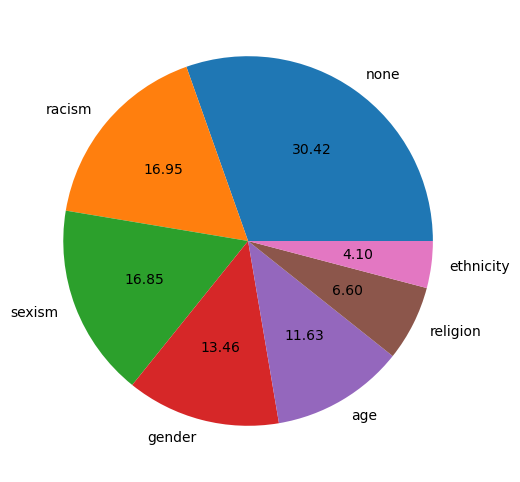

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['none','racism','sexism','gender','age','religion','ethnicity'],autopct="%0.2f")
plt.show()

In [23]:
#Analyse the count of words in each segment- both racism and sexism
#Function for checking word length
def cal_len(data):
    return len(data)

    
count_neutre_words=count_neutre['new'].str.split().apply(lambda z:cal_len(z))
count_racism_words=count_rasicm['new'].str.split().apply(lambda z:cal_len(z))
count_sexsim_words=count_sexsim['new'].str.split().apply(lambda z:cal_len(z))
print("*****************************************************")
print("Neutre email Words:" + str(count_neutre_words))
print("*****************************************************")
print("Racism email Words:" + str(count_racism_words))
print("*****************************************************")
print("Sexism email Words:" + str(count_sexsim_words))


*****************************************************
Neutre email Words:0       19
1       13
2       11
3       28
4       23
        ..
7937    14
7938    13
7939    11
7940    10
7942    10
Name: new, Length: 14339, dtype: int64
*****************************************************
Racism email Words:6        21
7        21
17       19
36       10
40       22
         ..
15977    21
16004    15
16009    15
16031    18
16033    19
Name: new, Length: 1932, dtype: int64
*****************************************************
Sexism email Words:8        13
13       24
22       17
24        8
44       13
         ..
16037    17
16042    20
16044    19
16045    26
16046    25
Name: new, Length: 3110, dtype: int64


#  Data Preprocessing


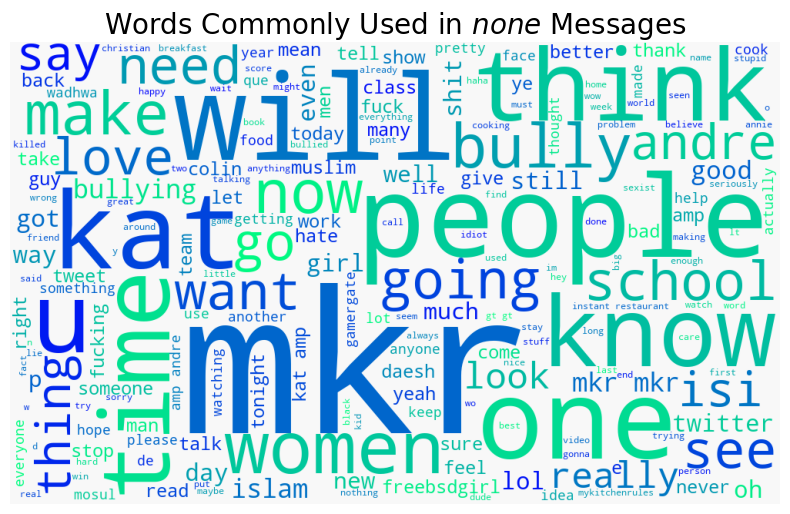

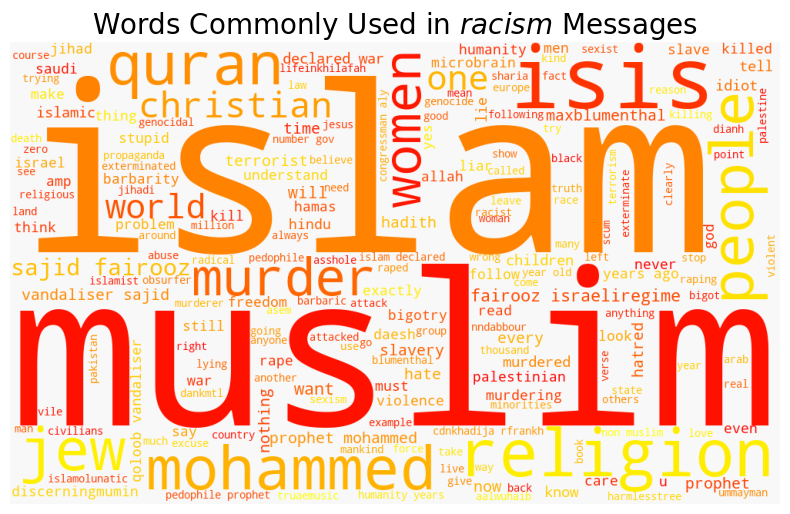

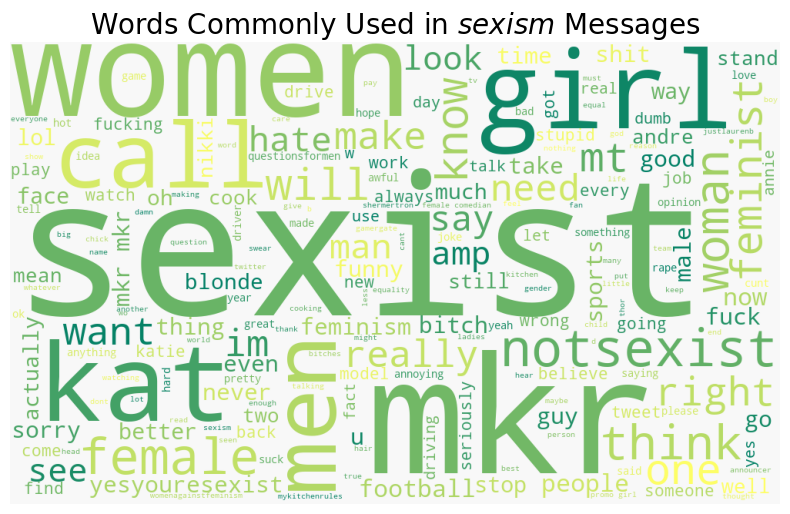

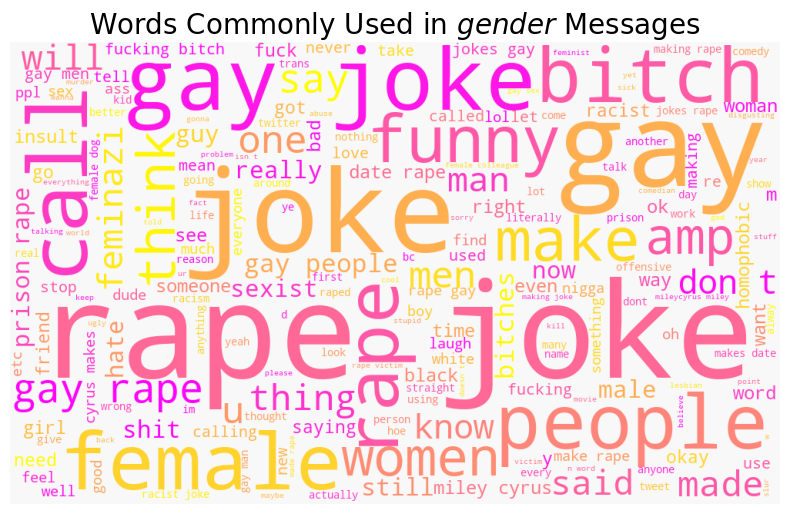

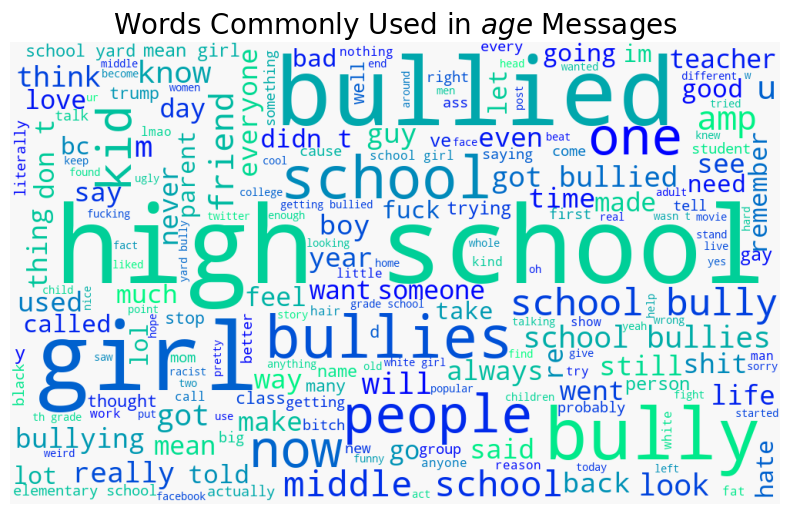

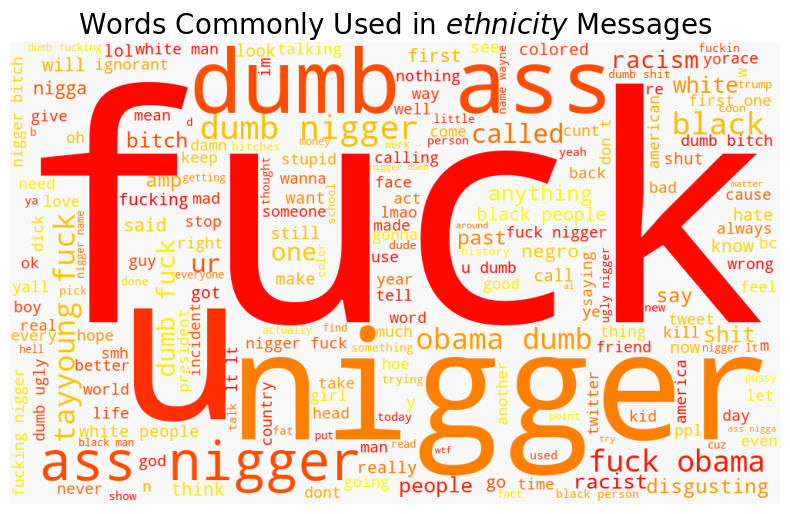

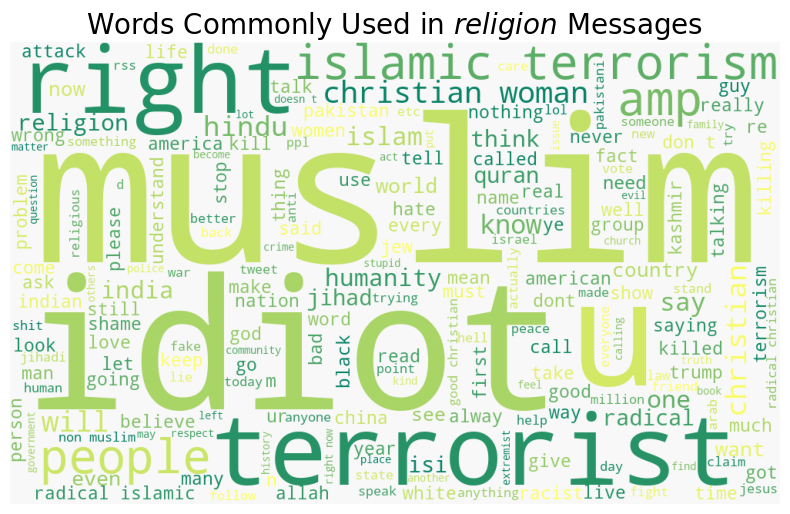

In [24]:
for type, cmap in zip(["none", "racism","sexism","gender", "age","ethnicity","religion"], ["winter", "autumn","summer","spring","winter", "autumn","summer"]):
    text = df.query("type ==@type")["new"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${type}$ Messages", size=20)
    plt.show()

<AxesSubplot:>

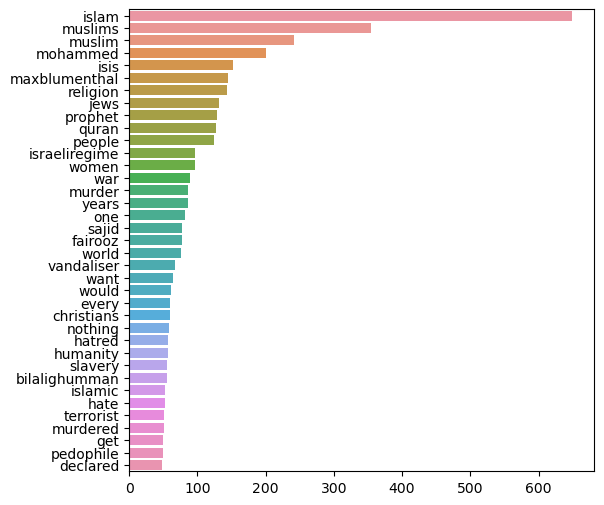

In [25]:
#Simplified counter function

def create_corpus(word):
    corpus=[]
    
    for x in df[df['type']==word]['new'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
stops=set(stopwords.words('english'))
stops.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
corpus=create_corpus('racism')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
racism=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        racism=x
sns.barplot(x=y,y=x)

<AxesSubplot:>

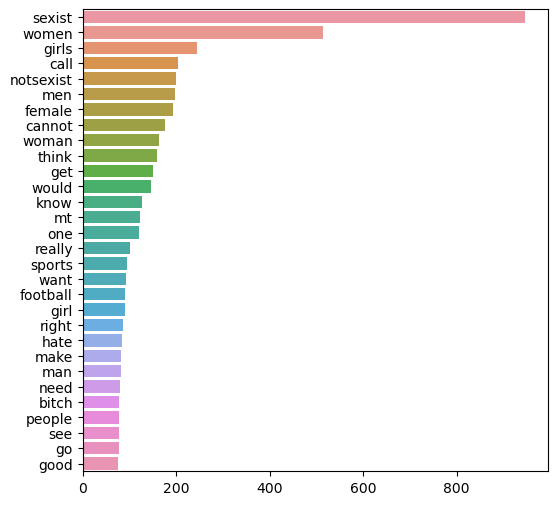

In [26]:
corpus=create_corpus('sexism')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
sexism=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        sexism=x
sns.barplot(x=y,y=x)


<AxesSubplot:>

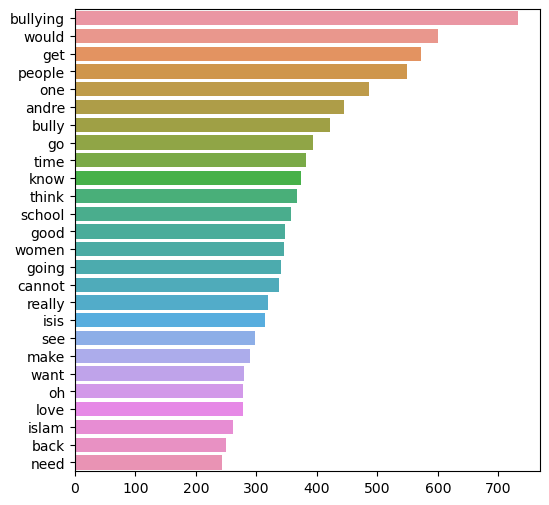

In [27]:
corpus=create_corpus('none')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
none=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        none=x
sns.barplot(x=y,y=x)

<AxesSubplot:>

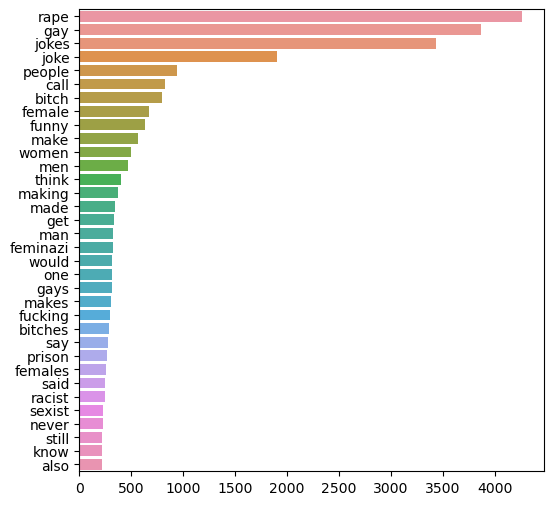

In [28]:
corpus=create_corpus('gender')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
gender=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        gender=x
sns.barplot(x=y,y=x)

<AxesSubplot:>

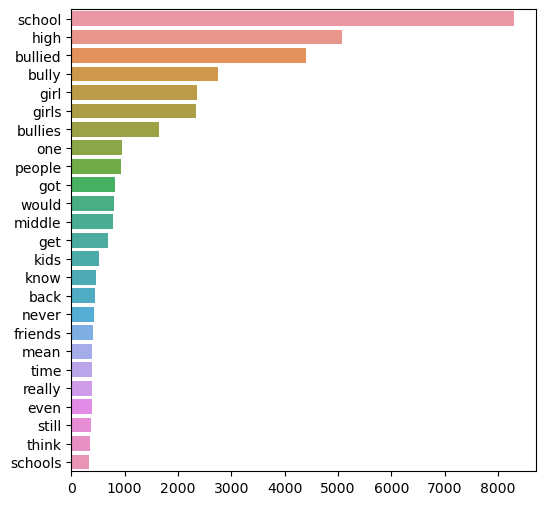

In [29]:
corpus=create_corpus('age')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
age=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        age=x
sns.barplot(x=y,y=x)

<AxesSubplot:>

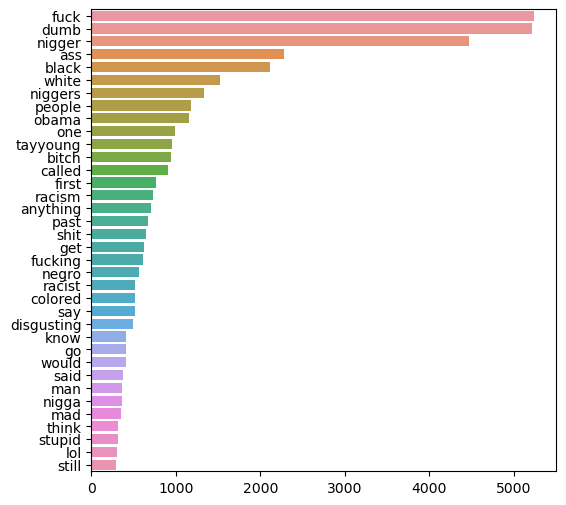

In [30]:
corpus=create_corpus('ethnicity')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
ethnicity=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        ethnicity=x
sns.barplot(x=y,y=x)

<AxesSubplot:>

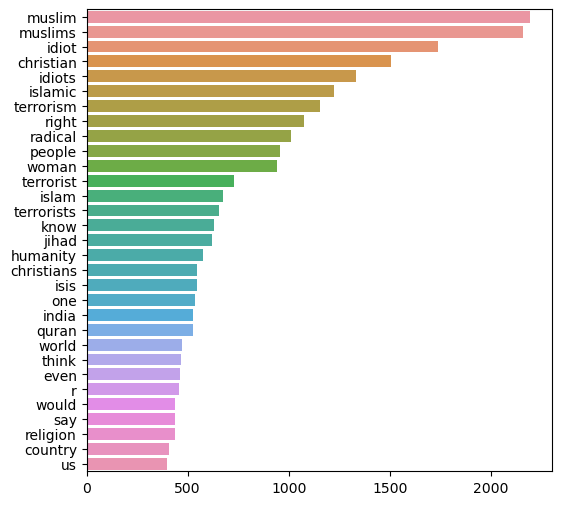

In [31]:
corpus=create_corpus('religion')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
religion=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
        religion=x
sns.barplot(x=y,y=x)

In [32]:

print(none)
print("********************************")
print(racism)
print("********************************")
print(sexism)
print("********************************")
print(age)
print("********************************")
print(gender)
print("********************************")
print(religion)
print("********************************")
print(ethnicity)

['bullying', 'would', 'get', 'people', 'one', 'andre', 'bully', 'go', 'time', 'know', 'think', 'school', 'good', 'women', 'going', 'cannot', 'really', 'isis', 'see', 'make', 'want', 'oh', 'love', 'islam', 'back', 'need']
********************************
['islam', 'muslims', 'muslim', 'mohammed', 'isis', 'maxblumenthal', 'religion', 'jews', 'prophet', 'quran', 'people', 'israeliregime', 'women', 'war', 'murder', 'years', 'one', 'sajid', 'fairooz', 'world', 'vandaliser', 'want', 'would', 'every', 'christians', 'nothing', 'hatred', 'humanity', 'slavery', 'bilalighumman', 'islamic', 'hate', 'terrorist', 'murdered', 'get', 'pedophile', 'declared']
********************************
['sexist', 'women', 'girls', 'call', 'notsexist', 'men', 'female', 'cannot', 'woman', 'think', 'get', 'would', 'know', 'mt', 'one', 'really', 'sports', 'want', 'football', 'girl', 'right', 'hate', 'make', 'man', 'need', 'bitch', 'people', 'see', 'go', 'good']
********************************
['school', 'high', 'bul

### Bigram / Lemmatization


In [33]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

df['new']=df['new'].apply(lambda z: lemma_traincorpus(z))

In [34]:
#check a sample from the lemmatized dataset
df['new'][5:10]

5             mariachimacabre is not the vast majority
6    dianh exposefalsehood and it is muslims who we...
7    truaemusic mattybboi number gov capital hill i...
8    fruitondabottom feminismisequalitywhen men are...
9    gather round kids it is story time brought to ...
Name: new, dtype: object

In [35]:
from collections import defaultdict
from collections import Counter
from plotly import tools
import plotly.offline as py
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    #filtered_tokens = [token for token in data.lower()  if token not in stopword]
    #word_freq=Counter(filtered_tokens)
    #print(word_freq.most_common(3))
    return final_tokens
#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace
def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace

def plot_grams(trace_1,trace_2,trace_3,trace_4,trace_5,trace_6,):
    fig = tools.make_subplots(rows=3, cols=2, vertical_spacing=0.04,subplot_titles=["sexism ", "racism ","age","gender","ethnicity","religion"])
    fig.append_trace(trace_1, 1, 1)
    fig.append_trace(trace_2, 1, 2)
    fig.append_trace(trace_3, 2, 1)
    fig.append_trace(trace_4, 2, 2)
    fig.append_trace(trace_5, 3, 1)
    fig.append_trace(trace_6, 3, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
train_df_S=count_sexsim['new']
train_df_RA=count_rasicm['new']
train_df_A=count_age['new']
train_df_G=count_gender['new']
train_df_E=count_ethnicity['new']
train_df_RE=count_religion['new']

print("Bi-gram analysis")
freq_train_df_S=create_dict(train_df_S[:200],2)
trace_S=create_new_df(freq_train_df_S)

freq_train_df_RA=create_dict(train_df_RA[:200],2)
trace_RA=create_new_df(freq_train_df_RA)

freq_train_df_A=create_dict(train_df_A[:200],2)
trace_A=create_new_df(freq_train_df_A)

freq_train_df_G=create_dict(train_df_G[:200],2)
trace_G=create_new_df(freq_train_df_G)

freq_train_df_E=create_dict(train_df_E[:200],3)
trace_E=create_new_df(freq_train_df_E)

freq_train_df_RE=create_dict(train_df_RE[:200],3)
trace_RE=create_new_df(freq_train_df_RE)

plot_grams(trace_S,trace_RA,trace_G,trace_E,trace_RE,trace_A)
print("Tri-gram analysis")
freq_train_df_S3=create_dict(train_df_S[:200],2)
trace_S=create_new_df(freq_train_df_S3)

freq_train_df_RA3=create_dict(train_df_RA[:200],3)
trace_RA=create_new_df(freq_train_df_RA3)

freq_train_df_A3=create_dict(train_df_A[:200],3)
trace_A=create_new_df(freq_train_df_A3)

freq_train_df_G3=create_dict(train_df_G[:200],3)
trace_G=create_new_df(freq_train_df_G3)

freq_train_df_E3=create_dict(train_df_E[:200],3)
trace_E=create_new_df(freq_train_df_E3)

freq_train_df_RE3=create_dict(train_df_RE[:200],3)
trace_RE=create_new_df(freq_train_df_RE3)

plot_grams(trace_S,trace_RA,trace_G,trace_E,trace_RE,trace_A)

Bi-gram analysis


C:\Users\PC\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Tri-gram analysis


C:\Users\PC\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [36]:
def convert_sentences_to_words(sentences):
    for sentence in sentences:        
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [37]:
text_to_list = df.values.tolist()

In [38]:

text_as_words = list(convert_sentences_to_words(text_to_list))

In [39]:
def remove_all_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


In [40]:
clean_words = remove_all_stop_words(text_as_words)


In [41]:
print(clean_words[0])

['rt', 'colonelkickhead', 'another', 'bloody', 'instant', 'restaurant', 'week', 'seriously', 'jumped', 'shark', 'riding', 'two', 'sharks', 'powered', 'sh', 'none', 'colonelkickhead', 'another', 'bloody', 'instant', 'restaurant', 'week', 'seriously', 'jumped', 'shark', 'riding', 'two', 'sharks', 'powered', 'sh']


In [42]:
import gensim

bigram = gensim.models.Phrases(clean_words, min_count=5, threshold=100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [43]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


In [44]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [45]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [46]:
clean_words_bigrams = make_bigrams(clean_words)

In [39]:
#clean_words_bigrams

In [47]:
clean_words_lemmatized = lemmatization(clean_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [48]:
clean_words_lemmatized

[['colonelkickhead',
  'bloody',
  'week',
  'seriously',
  'jumped_shark',
  'ride',
  'shark',
  'power',
  'none',
  'colonelkickhead',
  'bloody',
  'week',
  'seriously',
  'jumped_shark',
  'ride',
  'shark',
  'power'],
 ['peshmerga',
  'decimate',
  'isis',
  'far',
  'interesting',
  'https',
  'co',
  'none',
  'azzamalirhabi',
  'video',
  'peshmerga',
  'decimate',
  'isis',
  'far',
  'interesting'],
 ['really',
  'instant_restaurant',
  'shocking',
  'mkr',
  'mkr',
  'none',
  'really',
  'instant_restaurant',
  'shocking',
  'mkr',
  'mkr'],
 ['good',
  'week',
  'isis',
  'new',
  'front',
  'open',
  'sinjar',
  'lose',
  'battle',
  'none',
  'benfrancisallen',
  'good',
  'week',
  'isis',
  'new',
  'front',
  'open',
  'sinjar',
  'lose',
  'battle'],
 ['need',
  'femisnsn',
  'man',
  'carry',
  'heavy',
  'thing',
  'like',
  'shopping',
  'box',
  'huge',
  'sense',
  'superiori',
  'none',
  'notofeminism',
  'need',
  'femisnsn',
  'man',
  'carry',
  'heavy'

## Topic Model

In [49]:
id2word = corpora.Dictionary(clean_words_lemmatized)

In [50]:
texts = clean_words_lemmatized
print(texts[0])

['colonelkickhead', 'bloody', 'week', 'seriously', 'jumped_shark', 'ride', 'shark', 'power', 'none', 'colonelkickhead', 'bloody', 'week', 'seriously', 'jumped_shark', 'ride', 'shark', 'power']


In [51]:
corpus = [id2word.doc2bow(text) for text in texts]

In [52]:
print(corpus[0])

[(0, 2), (1, 2), (2, 2), (3, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)]


In [54]:
num_topics = 10

In [55]:
# Using Gensin to build the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=id2word, 
                                       num_topics=num_topics,
                                       )

In [56]:
# Print the Keyword in the N (=num_topics) topics
from pprint import pprint
pprint(lda_model.print_topics())
#pprint(lda_model.print_topics(N))

[(0,
  '0.020*"get" + 0.018*"bully" + 0.017*"mkr" + 0.016*"school" + 0.015*"fuck" + '
  '0.012*"none" + 0.012*"nigger" + 0.012*"joke" + 0.012*"rape" + '
  '0.012*"bitch"'),
 (1,
  '0.043*"school" + 0.039*"bully" + 0.027*"none" + 0.020*"age" + 0.011*"girl" '
  '+ 0.011*"mkr" + 0.010*"get" + 0.010*"take" + 0.010*"go" + 0.007*"want"'),
 (2,
  '0.019*"fuck" + 0.017*"none" + 0.015*"bully" + 0.014*"dumb" + 0.014*"muslim" '
  '+ 0.012*"first" + 0.010*"go" + 0.010*"racist" + 0.009*"right" + '
  '0.009*"use"'),
 (3,
  '0.106*"nigger" + 0.038*"fuck" + 0.036*"dumb" + 0.024*"black" + '
  '0.021*"bully" + 0.020*"ass" + 0.011*"none" + 0.011*"say" + 0.009*"know" + '
  '0.008*"man"'),
 (4,
  '0.029*"get" + 0.021*"nigger" + 0.021*"none" + 0.020*"fuck" + 0.015*"school" '
  '+ 0.012*"mkr" + 0.011*"say" + 0.010*"dumb" + 0.010*"people" + 0.008*"age"'),
 (5,
  '0.071*"dumb" + 0.032*"fuck" + 0.026*"ethnicity" + 0.020*"bitch" + '
  '0.018*"say" + 0.016*"go" + 0.014*"woman" + 0.013*"make" + 0.012*"none" + '
  

In [57]:
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print("Topic {}: {}".format(i, " ".join([word for word, _ in topic])))

Topic 0: get bully mkr school fuck none nigger joke rape bitch
Topic 1: school bully none age girl mkr get take go want
Topic 2: fuck none bully dumb muslim first go racist right use
Topic 3: nigger fuck dumb black bully ass none say know man
Topic 4: get nigger none fuck school mkr say dumb people age
Topic 5: dumb fuck ethnicity bitch say go woman make none people
Topic 6: call none fuck people get hate mkr bitch white see
Topic 7: bully girl none people mkr school go black ethnicity white
Topic 8: high school girl rape say know fuck none joke people
Topic 9: joke none high rape racism school say gay bully girl


In [58]:
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print("Topic {}: {}".format(i, " ".join([word for word, _ in topic])))

Topic 0: get bully mkr school fuck none nigger joke rape bitch
Topic 1: school bully none age girl mkr get take go want
Topic 2: fuck none bully dumb muslim first go racist right use
Topic 3: nigger fuck dumb black bully ass none say know man
Topic 4: get nigger none fuck school mkr say dumb people age
Topic 5: dumb fuck ethnicity bitch say go woman make none people
Topic 6: call none fuck people get hate mkr bitch white see
Topic 7: bully girl none people mkr school go black ethnicity white
Topic 8: high school girl rape say know fuck none joke people
Topic 9: joke none high rape racism school say gay bully girl


In [59]:
doc_lda = lda_model[corpus]

In [60]:
doc_lda

## LDA

In [61]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

In [62]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [63]:
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

In [64]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [65]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [66]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

In [67]:
LDAvis_prepared 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.035937 -0.008285       1        1  13.919030
0     -0.008163 -0.013590       2        1  12.067488
8      0.020999  0.021363       3        1  11.716011
1      0.101602 -0.071255       4        1  10.262320
5     -0.080257  0.068580       5        1  10.156607
2      0.005202  0.021625       6        1   9.191382
4     -0.033919 -0.024693       7        1   8.902779
3     -0.119700 -0.081523       8        1   8.787328
6     -0.000292  0.064970       9        1   8.120811
9      0.078591  0.022809      10        1   6.876244, topic_info=            Term          Freq         Total Category  logprob  loglift
7846      nigger  12658.000000  12658.000000  Default  30.0000  30.0000
533         dumb  14677.000000  14677.000000  Default  29.0000  29.0000
311         call   8112.000000   8112.000000  Default  28.0000  28.0000
197         fuck  15888.000000  15888.000000  Default  27.0000  27.0000
24773  ethnicity   6219.000000   6219.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
19           mkr    353.761072  10792.988262  Topic10  -5.2692  -0.7409
570            m    209.977367   1669.978368  Topic10  -5.7908   0.6035
58          give    222.673581   2715.980937  Topic10  -5.7321   0.1759
197         fuck    263.330479  15888.503015  Topic10  -5.5644  -1.4228
301        black    229.081944   7286.246823  Topic10  -5.7037  -0.7826

[900 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
5637       4  0.982118      abort
1108       1  0.010655        abt
1108       2  0.127856        abt
1108       3  0.042619        abt
1108       4  0.010655        abt
...      ...       ...        ...
10448     10  0.562575     yellow
10877      2  0.043298      yesss
10877      6  0.909259      yesss
21985     10  0.904271  zimmerman
12388      9  0.888699       zine

[2936 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 9, 2, 6, 3, 5, 4, 7, 10])

# Modeling

In [68]:
def lemmatize(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text.lower())

    # Lemmatize each word
    lem = WordNetLemmatizer()
    lemmatized_words = [lem.lemmatize(w) for w in words]

    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

# Apply the lemmatization function to the dataframe
df['new'] = df['new'].apply(lemmatize)

# Tokenize the lemmatized text into words
words = nltk.word_tokenize(' '.join(df['new']))

# Count the frequency of each word
freq_dist = nltk.FreqDist(words)

# Print the vocabulary size
print('Vocabulary size:', len(freq_dist))
vocab_size =len(freq_dist)
vocab_size

Vocabulary size: 50255


50255

### TFID

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, classification_report

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [75]:
X = df['new']  # Feature (raw data)
y = df['type']  # Target Label

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [77]:
tfidf = TfidfVectorizer(max_features = 10000)  # Using the TF - IDF Vectorizer to extract top 5000 most important features
# from the text data 

In [78]:
# Feature Extraction
X_train_tfidf = tfidf.fit_transform(X_train)  
X_test_tfidf = tfidf.transform(X_test)       

In [79]:
X_train_tfidf

<37712x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 720323 stored elements in Compressed Sparse Row format>

In [80]:
X_test_tfidf 

<9429x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 179494 stored elements in Compressed Sparse Row format>

### SVM

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1583
           1       0.99      0.99      0.99      1605
           2       0.97      0.95      0.96      1105
           3       0.87      0.91      0.89      2830
           4       0.80      0.68      0.74       386
           5       0.97      0.99      0.98      1305
           6       0.83      0.65      0.73       615

    accuracy                           0.93      9429
   macro avg       0.91      0.88      0.89      9429
weighted avg       0.92      0.93      0.92      9429



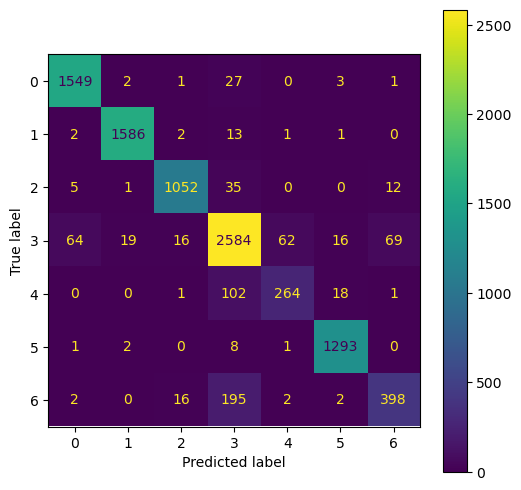

In [81]:
# SUPPORT VECTOR MACHINES
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))
plot_confusion_matrix(grid_svm_model, X_test_tfidf, y_test)

In [82]:
X_train,X_test,y_train,y_test = train_test_split(df[['new']],df['type'])

In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.new)
X_train = tokenizer.texts_to_sequences(X_train.new)
X_test = tokenizer.texts_to_sequences(X_test.new)

In [84]:
max_size = len(max(df.new,key=lambda x:len(x)))
max_size

1682

In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=max_size, padding='post')
X_test = pad_sequences(X_test, maxlen=max_size, padding='post')

In [86]:
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.utils import to_categorical
enc = OrdinalEncoder()
y_train,y_test = to_categorical(enc.fit_transform(X=y_train.to_frame()),num_classes=7),to_categorical(enc.fit_transform(X=y_test.to_frame()),num_classes=7)

In [87]:
def define_model(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D
from tensorflow.keras import regularizers
model = define_model(vocab_size,max_size)
history=model.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1105/1105 [==============================] - 219s 197ms/step - loss: 0.8770 - accuracy: 0.6954
Epoch 2/5
1105/1105 [==============================] - 219s 199ms/step - loss: 0.2824 - accuracy: 0.9175
Epoch 3/5
1105/1105 [==============================] - 219s 198ms/step - loss: 0.1639 - accuracy: 0.9540
Epoch 4/5
1105/1105 [==============================] - 220s 199ms/step - loss: 0.0980 - accuracy: 0.9743
Epoch 5/5
1105/1105 [==============================] - 224s 203ms/step - loss: 0.0620 - accuracy: 0.9848


In [44]:
results = model.evaluate(X_test, y_test)
results

369/369 [==============================] - 15s 40ms/step - loss: 0.4819 - accuracy: 0.8957


[0.481851190328598, 0.8957237601280212]

In [89]:
lenc = LabelEncoder()
df.type = lenc.fit_transform(df.type)

In [91]:
vec = TfidfVectorizer(max_features=10000)

X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(df.new.values).toarray(), 
                                                    df.type.values.reshape(-1,1), 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

### Random Forest

In [92]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [93]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 99.33 %
Test Accuracy   : 89.22 %
Precision       : 78.70 %
Recall          : 88.97 %


### Naive-Bayes

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1583
           1       0.90      0.93      0.92      1605
           2       0.93      0.87      0.90      1105
           3       0.77      0.87      0.82      2830
           4       0.84      0.25      0.39       386
           5       0.85      0.94      0.89      1305
           6       0.92      0.23      0.37       615

    accuracy                           0.84      9429
   macro avg       0.87      0.72      0.74      9429
weighted avg       0.85      0.84      0.82      9429



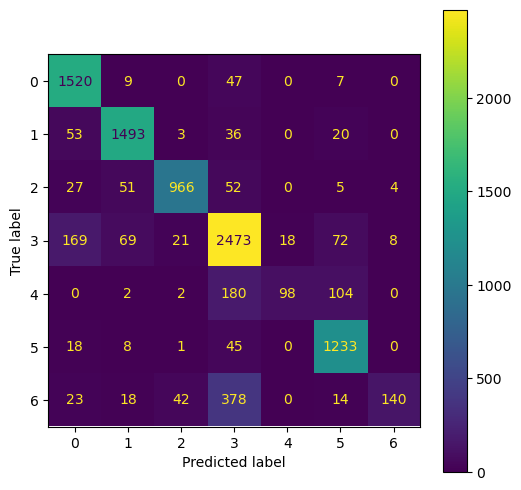

In [96]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
preds_nb_model = nb_model.predict(X_test)
print(classification_report(Y_test, preds_nb_model))
plot_confusion_matrix(nb_model, X_test, Y_test)

### Balaced Data

In [63]:
pip install imblearn 

     ------------------------------------ 226.0/226.0 kB 337.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [97]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_res, y_train_res = oversample.fit_resample(X_train, Y_train)




print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))

After OverSampling, the shape of train_X: (37712, 10000)
After OverSampling, the shape of train_y: (37712, 1) 



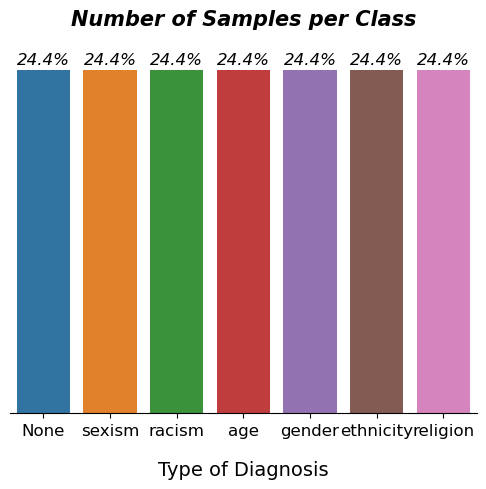

In [77]:
plt.figure(figsize=(5, 5))

sns.countplot(x = y_train_res)
sns.despine(top=True, right=True, left=True, bottom=False)

plt.xticks(ticks= [0,1,2,3,4,5,6], labels=['None', 'sexism','racism','age','gender','ethnicity','religion'], fontsize=12)
plt.yticks([])
plt.title('Number of Samples per Class' , fontsize=15 , pad=20 , fontstyle='italic' , fontweight = 800)
plt.xlabel('Type of Diagnosis' , fontsize=14 , fontweight=400, labelpad=16)
plt.ylabel('')
ax = plt.gca()

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/df.shape[0])), (p.get_x() + p.get_width() / 2., abs(p.get_height())), ha='center',
                va='bottom', color='black', xytext=(0,2), rotation='horizontal', textcoords='offset points', fontsize = 12, fontstyle = 'italic')

# plt.savefig("samples.png")
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1583
           1       0.90      0.91      0.90      1605
           2       0.86      0.91      0.89      1105
           3       0.93      0.58      0.72      2830
           4       0.53      0.88      0.66       386
           5       0.83      0.97      0.89      1305
           6       0.62      0.76      0.68       615

    accuracy                           0.82      9429
   macro avg       0.78      0.86      0.80      9429
weighted avg       0.84      0.82      0.81      9429



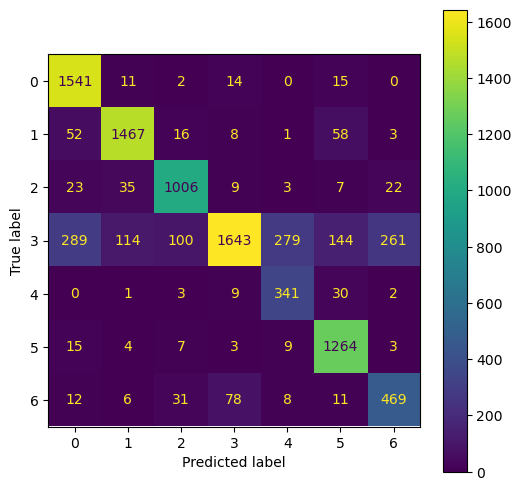

In [98]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train_res, y_train_res)
preds_nb_model = nb_model.predict(X_test)
print(classification_report(Y_test, preds_nb_model))
plot_confusion_matrix(nb_model, X_test, Y_test)